# Predicting Project approval on Donors Choose Data set

## 1.1 Loading Data

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
data = pd.read_csv('/content/gdrive/My Drive/copy_preprocessed_data.csv', nrows=50000)
data.head(1)

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,1,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05


<h2>1.2 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [ ]:
from sklearn.model_selection import train_test_split

y = data['project_is_approved'].values
X = data.drop(['project_is_approved'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
# X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train)

<h2>1.3 Make Data Model Ready: encoding essay, and project_title</h2>

In [ ]:
feature_names = []

# BOW Featurization
from sklearn.feature_extraction.text import CountVectorizer
print(X_train.shape, y_train.shape)
# print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

print("="*100)
# start = time.time()
vectorizer = CountVectorizer(min_df=10,ngram_range=(1,4), max_features=50000)
vectorizer.fit(X_train['essay'].values)

X_train_essay_bow = vectorizer.transform(X_train['essay'].values)
# X_cv_essay_bow = vectorizer.transform(X_cv['essay'].values)
X_test_essay_bow = vectorizer.transform(X_test['essay'].values)

# end = time.time()

# print("time: ", end-start)

print("After BOW vectorizations")
print(X_train_essay_bow.shape, y_train.shape)
# print(X_cv_essay_bow.shape, y_cv.shape)
print(X_test_essay_bow.shape, y_test.shape)
print("="*100)

feature_names.extend(vectorizer.get_feature_names())

# TF-IDF Featurization
from sklearn.feature_extraction.text import TfidfVectorizer

# start = time.time()

vectorizer = TfidfVectorizer(min_df=10,ngram_range=(1,4), max_features=50000)
vectorizer.fit(X_train['essay'].values)
X_train_essay_tfidf = vectorizer.transform(X_train['essay'].values)
# X_cv_essay_tfidf = vectorizer.transform(X_cv['essay'].values)
X_test_essay_tfidf = vectorizer.transform(X_test['essay'].values)

# end = time.time()

# print("time: ", end-start)

print("After TFIDF vectorizations")
print(X_train_essay_bow.shape, y_train.shape)
# print(X_cv_essay_bow.shape, y_cv.shape)
print(X_test_essay_bow.shape, y_test.shape)

feature_names.extend(vectorizer.get_feature_names())

(40000, 8) (40000,)
(10000, 8) (10000,)
After BOW vectorizations
(40000, 50000) (40000,)
(10000, 50000) (10000,)
After TFIDF vectorizations
(40000, 50000) (40000,)
(10000, 50000) (10000,)


<h2>1.4 Make Data Model Ready: encoding numerical, categorical features</h2>

#### school_state

In [ ]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['school_state'].values)

X_train_state_ohe = vectorizer.transform(X_train['school_state'].values)
# X_cv_state_ohe = vectorizer.transform(X_cv['school_state'].values)
X_test_state_ohe = vectorizer.transform(X_test['school_state'].values)

print("After vectorizations")
print(X_train_state_ohe.shape, y_train.shape)
# print(X_cv_state_ohe.shape, y_cv.shape)
print(X_test_state_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())

feature_names.extend(vectorizer.get_feature_names())

After vectorizations
(40000, 51) (40000,)
(10000, 51) (10000,)
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']


#### teacher_prefix

In [ ]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['teacher_prefix'].values)

X_train_teacher_ohe = vectorizer.transform(X_train['teacher_prefix'].values)
# X_cv_teacher_ohe = vectorizer.transform(X_cv['teacher_prefix'].values)
X_test_teacher_ohe = vectorizer.transform(X_test['teacher_prefix'].values)

print("After vectorizations")
print(X_train_teacher_ohe.shape, y_train.shape)
# print(X_cv_teacher_ohe.shape, y_cv.shape)
print(X_test_teacher_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())

feature_names.extend(vectorizer.get_feature_names())

After vectorizations
(40000, 5) (40000,)
(10000, 5) (10000,)
['dr', 'mr', 'mrs', 'ms', 'teacher']


#### project_grade_category

In [ ]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['project_grade_category'].values)

X_train_grade_ohe = vectorizer.transform(X_train['project_grade_category'].values)
# X_cv_grade_ohe = vectorizer.transform(X_cv['project_grade_category'].values)
X_test_grade_ohe = vectorizer.transform(X_test['project_grade_category'].values)

print("After vectorizations")
print(X_train_grade_ohe.shape, y_train.shape)
# print(X_cv_grade_ohe.shape, y_cv.shape)
print(X_test_grade_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())

feature_names.extend(vectorizer.get_feature_names())

After vectorizations
(40000, 4) (40000,)
(10000, 4) (10000,)
['grades_3_5', 'grades_6_8', 'grades_9_12', 'grades_prek_2']


#### teacher_number_of_previously_posted_projects

In [ ]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()

normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))

X_train_projectcount_norm = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
# X_cv_projectcount_norm = normalizer.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
X_test_projectcount_norm = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))

X_train_projectcount_norm = X_train_projectcount_norm.reshape(-1, 1)
# X_cv_projectcount_norm = X_cv_projectcount_norm.reshape(-1, 1)
X_test_projectcount_norm = X_test_projectcount_norm.reshape(-1, 1)

print("After vectorizations")
print(X_train_projectcount_norm.shape, y_train.shape)
# print(X_cv_projectcount_norm.shape, y_cv.shape)
print(X_test_projectcount_norm.shape, y_test.shape)

feature_names.append('teacher_number_of_previously_posted_projects')

After vectorizations
(40000, 1) (40000,)
(10000, 1) (10000,)


#### clean_categories

In [ ]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['clean_categories'].values)

X_train_category_ohe = vectorizer.transform(X_train['clean_categories'].values)
# X_cv_category_ohe = vectorizer.transform(X_cv['clean_categories'].values)
X_test_category_ohe = vectorizer.transform(X_test['clean_categories'].values)

print("After vectorizations")
print(X_train_category_ohe.shape, y_train.shape)
# print(X_cv_category_ohe.shape, y_cv.shape)
print(X_test_category_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())

feature_names.extend(vectorizer.get_feature_names())

After vectorizations
(40000, 9) (40000,)
(10000, 9) (10000,)
['appliedlearning', 'care_hunger', 'health_sports', 'history_civics', 'literacy_language', 'math_science', 'music_arts', 'specialneeds', 'warmth']


#### clean_subcategories

In [ ]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['clean_subcategories'].values)

X_train_subcategories_ohe = vectorizer.transform(X_train['clean_subcategories'].values)
# X_cv_subcategories_ohe = vectorizer.transform(X_cv['clean_subcategories'].values)
X_test_subcategories_ohe = vectorizer.transform(X_test['clean_subcategories'].values)

print("After vectorizations")
print(X_train_subcategories_ohe.shape, y_train.shape)
# print(X_cv_subcategories_ohe.shape, y_cv.shape)
print(X_test_subcategories_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())

feature_names.extend(vectorizer.get_feature_names())

After vectorizations
(40000, 30) (40000,)
(10000, 30) (10000,)
['appliedsciences', 'care_hunger', 'charactereducation', 'civics_government', 'college_careerprep', 'communityservice', 'earlydevelopment', 'economics', 'environmentalscience', 'esl', 'extracurricular', 'financialliteracy', 'foreignlanguages', 'gym_fitness', 'health_lifescience', 'health_wellness', 'history_geography', 'literacy', 'literature_writing', 'mathematics', 'music', 'nutritioneducation', 'other', 'parentinvolvement', 'performingarts', 'socialsciences', 'specialneeds', 'teamsports', 'visualarts', 'warmth']


#### price

In [ ]:
normalizer = Normalizer()

normalizer.fit(X_train['price'].values.reshape(1,-1))

X_train_price_norm = normalizer.transform(X_train['price'].values.reshape(1,-1))
# X_cv_price_norm = normalizer.transform(X_cv['price'].values.reshape(1,-1))
X_test_price_norm = normalizer.transform(X_test['price'].values.reshape(1,-1))

X_train_price_norm = X_train_price_norm.reshape(-1, 1)
# X_cv_price_norm = X_cv_price_norm.reshape(-1, 1)
X_test_price_norm = X_test_price_norm.reshape(-1, 1)
print("After vectorizations")
print(X_train_price_norm.shape, y_train.shape)
# print(X_cv_price_norm.shape, y_cv.shape)
print(X_test_price_norm.shape, y_test.shape)

feature_names.append('price')

After vectorizations
(40000, 1) (40000,)
(10000, 1) (10000,)


#### Concatinating all the features

In [ ]:
from scipy.sparse import hstack

# BOW Set
X_tr_bow = hstack((X_train_essay_bow, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe, X_train_projectcount_norm, X_train_category_ohe, X_train_subcategories_ohe, X_train_price_norm)).tocsr()
# X_cr_bow = hstack((X_cv_essay_bow, X_cv_state_ohe, X_cv_teacher_ohe, X_cv_grade_ohe, X_cv_projectcount_norm, X_cv_category_ohe, X_cv_subcategories_ohe, X_cv_price_norm)).tocsr()
X_te_bow = hstack((X_test_essay_bow, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe, X_test_projectcount_norm, X_test_category_ohe, X_test_subcategories_ohe, X_test_price_norm)).tocsr()

print("Final BOW Data matrix:")
print(X_tr_bow.shape, y_train.shape)
# print(X_cr_bow.shape, y_cv.shape)
print(X_te_bow.shape, y_test.shape)

print("="*100)
# TFIDF Set
X_tr_tfidf = hstack((X_train_essay_tfidf, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe, X_train_projectcount_norm, X_train_category_ohe, X_train_subcategories_ohe, X_train_price_norm)).tocsr()
# X_cr_tfidf = hstack((X_cv_essay_tfidf, X_cv_state_ohe, X_cv_teacher_ohe, X_cv_grade_ohe, X_cv_projectcount_norm, X_cv_category_ohe, X_cv_subcategories_ohe, X_cv_price_norm)).tocsr()
X_te_tfidf = hstack((X_test_essay_tfidf, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe, X_test_projectcount_norm, X_test_category_ohe, X_test_subcategories_ohe, X_test_price_norm)).tocsr()

print("Final TFIDF Data matrix:")
print(X_tr_tfidf.shape, y_train.shape)
# print(X_cr_tfidf.shape, y_cv.shape)
print(X_te_tfidf.shape, y_test.shape)

Final BOW Data matrix:
(40000, 50101) (40000,)
(10000, 50101) (10000,)
Final TFIDF Data matrix:
(40000, 50101) (40000,)
(10000, 50101) (10000,)


### Hyper Parameter Tuning

#### Bag of Words Feature set

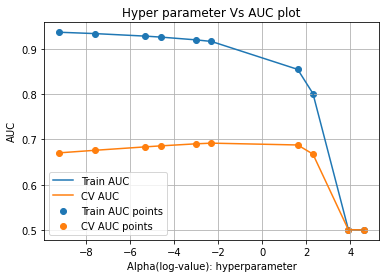

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
2,0.072411,0.000274,0.023350,0.000634,0.0001,{'alpha': 0.0001},0.674629,0.674523,0.661858,0.670337,0.005995,7,0.937620,0.938539,0.934464,0.936874,0.001745
6,0.076445,0.003410,0.023127,0.000610,0.0005,{'alpha': 0.0005},0.680505,0.680437,0.666873,0.675938,0.006410,6,0.934702,0.935520,0.931506,0.933909,0.001732
8,0.072641,0.001446,0.026598,0.005497,0.005,{'alpha': 0.005},0.687499,0.688948,0.674292,0.683580,0.006594,5,0.929146,0.929877,0.925849,0.928291,0.001752
4,0.074004,0.002345,0.023462,0.000531,0.01,{'alpha': 0.01},0.689562,0.691199,0.676505,0.685755,0.006575,4,0.927025,0.927736,0.923698,0.926153,0.001760
5,0.078071,0.002739,0.023222,0.000206,0.05,{'alpha': 0.05},0.693714,0.696643,0.680535,0.690297,0.007006,2,0.920906,0.921567,0.917493,0.919989,0.001786


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt
import numpy as np

naive = MultinomialNB(alpha = 1.0, class_prior = [0.5, 0.5])
parameters = {'alpha':[0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100]} #10^-5 to 10^2
clf = RandomizedSearchCV(naive, parameters, cv=3, scoring='roc_auc', return_train_score=True)
clf.fit(X_tr_bow, y_train)

results = pd.DataFrame.from_dict(clf.cv_results_)

results = results.sort_values(['param_alpha'])

train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score']
cv_auc_std= results['std_test_score']
alpha =  np.log(results['param_alpha'].astype('float')) # Taking log for readability

plt.plot(alpha, train_auc, label='Train AUC')

plt.plot(alpha, cv_auc, label='CV AUC')

plt.scatter(alpha, train_auc, label='Train AUC points')
plt.scatter(alpha, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("Alpha(log-value): hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()
plt.show()

results.head()


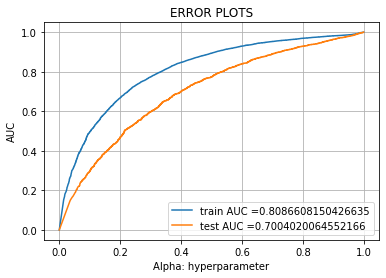

In [ ]:
from sklearn.metrics import roc_curve, auc
from math import exp

# best log-alpha = 2.1
naive = MultinomialNB(alpha = exp(2.1), class_prior = [0.5, 0.5])
naive.fit(X_tr_bow, y_train)
# a = naive.predict_proba(X_tr_bow)[1,:]
# a

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, naive.predict_proba(X_tr_bow)[:,1])
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, naive.predict_proba(X_te_bow)[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("Alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [ ]:
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

the maximum value of tpr*(1-fpr) 0.5484757649752771 for threshold 1.0


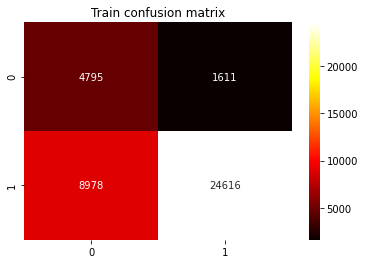

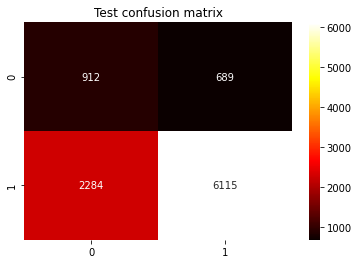

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
plt.title("Train confusion matrix")
cm_train = confusion_matrix(y_train, predict_with_best_t(naive.predict_proba(X_tr_bow)[:,1], best_t))

sns.heatmap(cm_train, annot=True,fmt="d",cmap='hot')
plt.show()
print()
print("="*100)
print()
plt.title("Test confusion matrix")
cm_test = confusion_matrix(y_test, predict_with_best_t(naive.predict_proba(X_te_bow)[:,1], best_t))

sns.heatmap(cm_test, annot=True,fmt="d",cmap='hot')
plt.show()

#### TFIDF Feature set

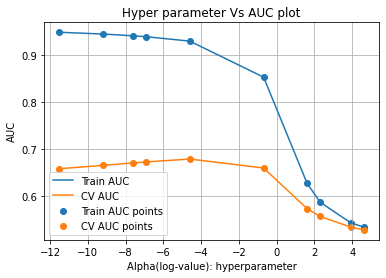

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
2,0.074914,0.000537,0.023889,0.000534,1e-05,{'alpha': 1e-05},0.662743,0.658513,0.652432,0.657896,0.004232,6,0.948744,0.948839,0.945951,0.947845,0.001340
0,0.073234,0.002292,0.023448,0.000644,0.0001,{'alpha': 0.0001},0.669792,0.666080,0.659197,0.665023,0.004389,4,0.945112,0.944929,0.942037,0.944026,0.001409
7,0.074048,0.000131,0.024045,0.000145,0.0005,{'alpha': 0.0005},0.674969,0.671579,0.663982,0.670177,0.004594,3,0.941532,0.941142,0.938237,0.940303,0.001470
3,0.071390,0.000226,0.024385,0.000708,0.001,{'alpha': 0.001},0.677124,0.673919,0.665980,0.672341,0.004685,2,0.939618,0.939141,0.936226,0.938328,0.001499
8,0.072600,0.000521,0.023750,0.000154,0.01,{'alpha': 0.01},0.683022,0.680866,0.671502,0.678463,0.005000,1,0.930478,0.929745,0.926783,0.929002,0.001597


In [ ]:
naive = MultinomialNB(alpha = 1.0, class_prior = [0.5, 0.5])
parameters = {'alpha':[0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100]} #10^-5 to 10^2
clf = RandomizedSearchCV(naive, parameters, cv=3, scoring='roc_auc', return_train_score=True)
clf.fit(X_tr_tfidf, y_train)

results = pd.DataFrame.from_dict(clf.cv_results_)

results = results.sort_values(['param_alpha'])

train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score']
cv_auc_std= results['std_test_score']
alpha =  np.log(results['param_alpha'].astype('float')) # Taking log for readability

plt.plot(alpha, train_auc, label='Train AUC')

plt.plot(alpha, cv_auc, label='CV AUC')

plt.scatter(alpha, train_auc, label='Train AUC points')
plt.scatter(alpha, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("Alpha(log-value): hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()
plt.show()

results.head()


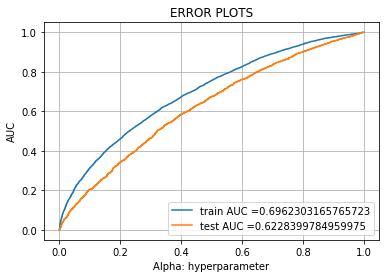

In [ ]:
# best log-alpha = 2.1
naive = MultinomialNB(alpha = exp(1), class_prior = [0.5, 0.5])
naive.fit(X_tr_tfidf, y_train)
# a = naive.predict_proba(X_tr_bow)[1,:]
# a

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, naive.predict_proba(X_tr_tfidf)[:,1])
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, naive.predict_proba(X_te_tfidf)[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("Alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

the maximum value of tpr*(1-fpr) 0.4105286853496262 for threshold 0.982


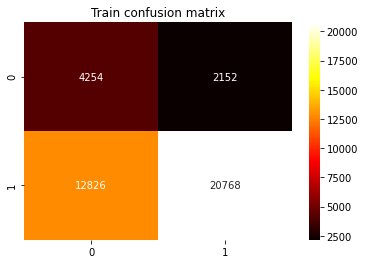

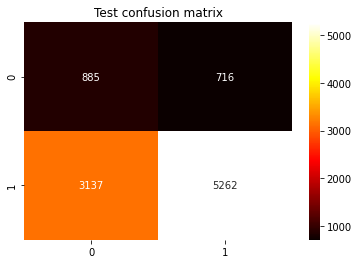

In [ ]:
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
plt.title("Train confusion matrix")
cm_train = confusion_matrix(y_train, predict_with_best_t(naive.predict_proba(X_tr_tfidf)[:,1], best_t))

sns.heatmap(cm_train, annot=True,fmt="d",cmap='hot')
plt.show()
print()
print("="*100)
print()
plt.title("Test confusion matrix")
cm_test = confusion_matrix(y_test, predict_with_best_t(naive.predict_proba(X_te_tfidf)[:,1], best_t))

sns.heatmap(cm_test, annot=True,fmt="d",cmap='hot')
plt.show()

In [ ]:
print(feature_names)

['00', '000', '000 students', '10', '10 000', '10 11', '10 12', '10 15', '10 chromebooks', '10 different', '10 minutes', '10 students', '10 year', '10 year old', '10 year olds', '10 years', '10 years old', '100', '100 free', '100 free breakfast', '100 free breakfast lunch', '100 free lunch', '100 free reduced', '100 free reduced lunch', '100 minutes', '100 participation', '100 percent', '100 percent free', '100 percent students', '100 percent students receive', '100 poverty', '100 receive', '100 receive free', '100 school', '100 student', '100 students', '100 students free', '100 students qualify', '100 students qualify free', '100 students receive', '100 students receive free', '100 students receiving', '100 students receiving free', '100 students school', '100 students school receive', '100 title', '100 years', '100 years old', '1000', '1000 students', '10th', '10th grade', '10th graders', '11', '11 12', '11 students', '11 year', '11 years', '110', '11th', '11th 12th', '11th grade', 

In [ ]:
negatives = np.argsort(naive.feature_log_prob_[0])[::-1][:20]
positives = np.argsort(naive.feature_log_prob_[1])[::-1][:20]

print("Top feature names for Negative class:")
for i in negatives:
  print(feature_names[i])
print('\n\n')
print("Top feature names for Positive class:")
for i in positives:
  print(feature_names[i])

Top feature names for Negative class:
11
12 school
11th
12 students
11 12
11 year
15
15 different
15 20
12
11 years
10 000
12 years
150 students
14 years
11th grade
120
110
10th graders
100 students school



Top feature names for Positive class:
11
12 school
11th
12 students
11 12
11 year
15
15 different
15 20
12
10 000
11 years
14 years
12 years
150 students
11th grade
110
10th graders
120
12 year


<h1>Summary</h1>


<!DOCTYPE html>
<html>
<head>
<style>
table {
  font-family: arial, sans-serif;
  border-collapse: collapse;
  width: 100%;
}

td, th {
  border: 1px solid #dddddd;
  text-align: left;
  padding: 8px;
}

tr:nth-child(even) {
  background-color: #dddddd;
}
</style>
</head>
<body>

<table>
  <tr>
    <th>Vectorizer</th>
    <th>Model</th>
    <th>Hyperparameter</th>
    <th>test AUC</th>
  </tr>
  <tr>
    <th>BOW</th>
    <th>MultinomialNB</th>
    <th>2.1</th>
    <th>0.7</th>
  </tr>
  <tr>
    <th>TFIDF</th>
    <th>MultinomialNB</th>
    <th>2.1</th>
    <th>0.61</th>
  </tr>
</table>

</body>
</html>
